In [1]:
# Library imports
import scipy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def getAcceleration(t, y): #Returns vector of 0 in v, a in acc
    NBodies = int(len(y)/6)
    accelerations = np.zeros(y.size)
    
    for i in range(NBodies):
        ioffset = i*6
        
        for j in range(NBodies):
            joffset = j*6
            accelerations[ioffset:ioffset+3] = 0
            
            if i != j:
                d = y[ioffset:ioffset+3] - y[joffset:joffset+3]
                r = np.sqrt(np.sum(d**2))
                a = d*G*masses[j]/(r**3)
                accelerations[ioffset+3:ioffset+6] += a
    
    return accelerations

In [3]:
def getVelocities(y):
    NBodies = int(len(y)/6)
    velocities = np.zeros(y.size)
    
    for i in range(NBodies):
        ioffset = i*6
        
        for j in range(NBodies):
            joffset = j*6
            velocities[ioffset:ioffset+3] = y[ioffset+3:ioffset+6]
            
    return velocities

In [4]:
def LeapFrog(t, dt, y):
    y_new = y + getAcceleration(t, y)*dt/2
    
    y_new =y_new + getVelocities(y_new) * dt
    
    y_new = y_new + getAcceleration(t, y_new)*dt/2
    
    return y_new

In [5]:
def runLeapFrog(T, dt, y0, masses, t0 = 0):
    nsteps = int((T-t0)/dt)
    history = np.empty((nsteps+1, len(y0)))
    energies = np.empty((nsteps+1, 2))
    A = np.empty((nsteps+1,3))
    
    history[0, :] = y0
    energies[0,0], energies[0,1], A[0,:] = getEnergyAndAMomentum(y0, masses)
    
    t = t0
    for i in range(nsteps):
        history[i+1] = LeapFrog(t, dt, history[i,:])
        energies[i+1,0],energies[i+1,1], A[i+1,:] = getEnergyAndAMomentum(history[i+1],masses)
        t += dt

    return history, energies, A

In [6]:
def getEnergyAndAMomentum(y, masses):
    v = getVelocities(y).copy().reshape((-1,6))[:,:3]
    m = masses.copy().reshape((-1,1))
    KE = 0.5 * np.sum(np.sum( m * v**2 ))
    
    
    yAux = y.copy().reshape((-1,6))
    
    
    x = yAux[:,0].reshape(-1, 1)
    y = yAux[:,1].reshape(-1, 1)
    z = yAux[:,2].reshape(-1, 1)
    
    dx = x.T - x
    dy = y.T - y
    dz = z.T - z
    
    
    inv_r = np.sqrt(dx**2 + dy**2 + dz**2)
    inv_r[inv_r>0] = 1.0/inv_r[inv_r>0]

    PE = -G * np.sum(np.sum(np.triu(-(m*m.T)*inv_r,1)))
    
    A = np.zeros(3)
    for i in range(len(y)):
        A += np.cross(yAux[i,:3], yAux[i,3:]*m[i])
        
    return KE, PE, A

In [7]:
# Variable declaration 1
G = -6.67*(10**-11)
t0 = 0
T = 6.221e6
dt = 3600  
y0 = np.array([3.84e8, 0, 0, 0, 1000, 0,
               0, 0, 0, 0, 0, 0])
masses = np.array([7.347e22, 5.97e24])

In [8]:
# Variable declaration 2 -> Saturn, Janus and Epithemeus
G = -6.67*(10**-20)
t0 = 0
T = 6.221e6
dt = 360
y0 = np.array([0, 0, 0, 0, 0, 0,                                  #Saturn
               0.11e6, 0.93e5, -0.17e5, -0.99e1, 0.12e2, -0.8e-1, #Janus
              0.19e5, -0.14e6,0.15e5,0.16e2, 0.17e1, -0.15e1])    #Epithemeus
masses = np.array([5.68e26, 1.89e18, 5.26e17])
y0 = np.array([0, 0, 0, 0, 0, 0,                                  #Saturn
               0.11e6, 0.93e5, -0.17e5, -0.99e1, 0.12e2, -0.8e-1, #Janus
              0.19e5, -0.14e6,0.15e5,0.16e2, 0.17e1, -0.15e1])    #Epithemeus
masses = np.array([5.68e26, 1.89e18, 5.26e17])

In [9]:
# Variable declaration 4 -> figure 8
G = -1
t0 = 0
T = 5
dt = 0.01
y0 = np.array([0.97000436, -0.24308753, 0,  0.93240737/2, 0.86473146/2, 0,
                -0.97000436, 0.24308753,0, 0.93240737/2, 0.86473146/2, 0,
                0,0,0,-0.93240737,  -0.86473146,0])
masses = np.array([1, 1, 1])

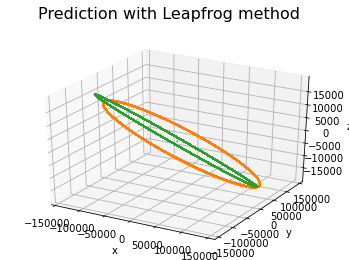

In [9]:
history, energies, A = runLeapFrog(T, dt, y0, masses)

fig = plt.figure()
fig.suptitle('Prediction with Leapfrog method', fontsize=16)
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

ax.plot3D(history[:,0], history[:,1], history[:,2])
ax.plot3D(history[:,6], history[:,7], history[:,8])
ax.plot3D(history[:,12], history[:,13], history[:,14])
print()

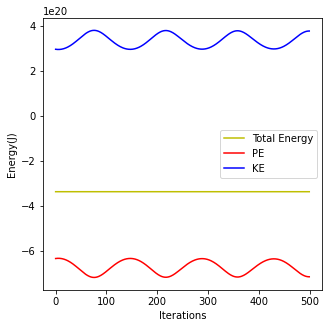

In [10]:
plt.figure(figsize = (5,5))
plt.plot(energies[:500,0]+energies[:500,1], 'y', label = 'Total Energy')
plt.plot(energies[:500,1], 'r', label = 'PE')
plt.plot(energies[:500,0], 'b', label = 'KE')
plt.xlabel("Iterations")
plt.ylabel("Energy(J)")
plt.legend(loc="best")
plt.show()

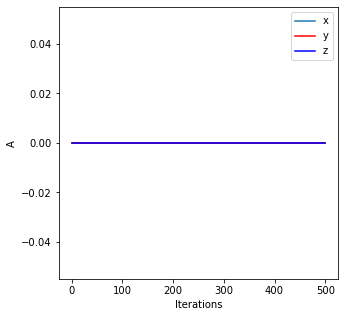

In [263]:
plt.figure(figsize = (5,5))
plt.plot(A[:,0], label = 'x')
plt.plot(A[:,0], 'r', label = 'y')
plt.plot(A[:,0], 'b', label = 'z')
plt.xlabel("Iterations")
plt.ylabel("A")
plt.legend(loc="best")
plt.show()

In [264]:
A

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.04083409e-17],
       [ 0.00000000e+00,  0.00000000e+00, -5.20417043e-17],
       ...,
       [ 0.00000000e+00,  0.00000000e+00, -7.77156117e-16],
       [ 0.00000000e+00,  0.00000000e+00, -6.66133815e-16],
       [ 0.00000000e+00,  0.00000000e+00, -7.77156117e-16]])